In [12]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# File to Load
path_2015 = "../Resources/2015_df.csv"
path_2016 = "../Resources/2016_df.csv"
path_2017 = "../Resources/2017_df.csv"

# Read csv Data File and store into Pandas Data Frames
runner_2015_df = pd.read_csv(path_2015)
runner_2016_df = pd.read_csv(path_2016)
runner_2017_df = pd.read_csv(path_2017)

In [14]:
runnertime_2015_df=runner_2015_df.loc[:,["Name","Official Time"]]
runnertime_2015_df.head()

,Name,Official Time
0,"Desisa, Lelisa",2:09:17
1,"Tsegay, Yemane Adhane",2:09:48
2,"Chebet, Wilson",2:10:22
3,"Kipyego, Bernard",2:10:47
4,"Korir, Wesley",2:10:49


In [15]:
runnertime_2016_df=runner_2016_df.loc[:,["Name","Official Time"]]
runnertime_2016_df.head()

,Name,Official Time
0,"Hayle, Lemi Berhanu",2:12:45
1,"Desisa, Lelisa",2:13:32
2,"Tsegay, Yemane Adhane",2:14:02
3,"Korir, Wesley",2:14:05
4,"Lonyangata, Paul",2:15:45


In [16]:
runnertime_2017_df=runner_2017_df.loc[:,["Name","Official Time"]]
runnertime_2017_df.head()

,Name,Official Time
0,"Kirui, Geoffrey",2:09:37
1,"Rupp, Galen",2:09:58
2,"Osako, Suguru",2:10:28
3,"Biwott, Shadrack",2:12:08
4,"Chebet, Wilson",2:12:35


In [17]:
def time_convert(x):
   times = x.split(':')
   return (3600*int(times[0])+60*int(times[1]))+int(times[2])

In [30]:
runnertime_2015_df["Official Time"]=runnertime_2015_df["Official Time"].apply(time_convert)
runnertime_2016_df["Official Time"]=runnertime_2016_df["Official Time"].apply(time_convert)
runnertime_2017_df["Official Time"]=runnertime_2017_df["Official Time"].apply(time_convert)

AttributeError: 'int' object has no attribute 'split'

In [31]:
runner2015_df = runnertime_2015_df.sort_values("Official Time", ascending = True)
runner2016_df = runnertime_2016_df.sort_values("Official Time", ascending = True)
runner2017_df = runnertime_2017_df.sort_values("Official Time", ascending = True)

In [32]:
len(runnertime_2015_df)

26305

In [33]:
top10_2015_df=runnertime_2015_df.head(2631)
top10_2015_df.head()


,Name,Official Time
0,"Desisa, Lelisa",7757
1,"Tsegay, Yemane Adhane",7788
2,"Chebet, Wilson",7822
3,"Kipyego, Bernard",7847
4,"Korir, Wesley",7849


In [34]:
len(runnertime_2016_df)

26490

In [35]:
top10_2016_df=runnertime_2016_df.head(2649)
top10_2016_df.head()

,Name,Official Time
0,"Hayle, Lemi Berhanu",7965
1,"Desisa, Lelisa",8012
2,"Tsegay, Yemane Adhane",8042
3,"Korir, Wesley",8045
4,"Lonyangata, Paul",8145


In [36]:
len(runnertime_2017_df)

26262

In [37]:
top10_2017_df=runnertime_2017_df.head(2626)
top10_2017_df.head()

,Name,Official Time
0,"Kirui, Geoffrey",7777
1,"Rupp, Galen",7798
2,"Osako, Suguru",7828
3,"Biwott, Shadrack",7928
4,"Chebet, Wilson",7955


In [38]:
runnertime_20152016_df = pd.merge(top10_2015_df,top10_2016_df,on="Name")
runnertime_20162017_df = pd.merge(top10_2016_df,top10_2017_df,on="Name")
runnertime_20152017_df = pd.merge(top10_2015_df,top10_2017_df,on="Name")
runnertime_20152016_df.head()

,Name,Official Time_x,Official Time_y
0,"Desisa, Lelisa",7757,8012
1,"Tsegay, Yemane Adhane",7788,8042
2,"Korir, Wesley",7849,8045
3,"Mercier, Christian",8677,9270
4,"Boudalia, Said Sr.",8689,8861


In [39]:
runnertime_20152016_df['time_difference_20152016'] = runnertime_20152016_df.apply(lambda _: '', axis=1)
runnertime_20162017_df['time_difference_20152016'] = runnertime_20152016_df.apply(lambda _: '', axis=1)
runnertime_20152017_df['time_difference_20152016'] = runnertime_20152016_df.apply(lambda _: '', axis=1)
runnertime_20152016_df.head()

,Name,Official Time_x,Official Time_y,time_difference_20152016
0,"Desisa, Lelisa",7757,8012,
1,"Tsegay, Yemane Adhane",7788,8042,
2,"Korir, Wesley",7849,8045,
3,"Mercier, Christian",8677,9270,
4,"Boudalia, Said Sr.",8689,8861,


In [40]:
#compare the time with previous year ,if runtime difference a negative number, runner's performance improved.
runnertime_20152016_df["Official Time_2015"]=runnertime_20152016_df["Official Time_x"]
runnertime_20152016_df["Official Time_2016"]=runnertime_20152016_df["Official Time_y"]
runnertime_20152016_df["time_difference_20152016"] = runnertime_20152016_df["Official Time_2016"]-runnertime_20152016_df["Official Time_2015"]

runnertime_20162017_df["Official Time_2016"]=runnertime_20162017_df["Official Time_x"]
runnertime_20162017_df["Official Time_2017"]=runnertime_20162017_df["Official Time_y"]
runnertime_20162017_df["time_difference_20162017"] = runnertime_20162017_df["Official Time_2017"]-runnertime_20162017_df["Official Time_2016"]

runnertime_20152017_df["Official Time_2015"]=runnertime_20152016_df["Official Time_x"]
runnertime_20152017_df["Official Time_2017"]=runnertime_20152016_df["Official Time_y"]
runnertime_20152017_df["time_difference_20152017"] = runnertime_20152017_df["Official Time_2017"]-runnertime_20152017_df["Official Time_2015"]
runnertime_20152017_df.head()

,Name,Official Time_x,Official Time_y,time_difference_20152016,Official Time_2015,Official Time_2017,time_difference_20152017
0,"Chebet, Wilson",7822,7955,,7757,8012,255
1,"Korir, Wesley",7849,8294,,7788,8042,254
2,"Keflezighi, Meb",7962,8220,,7849,8045,196
3,"Mercier, Christian",8677,9874,,8677,9270,593
4,"Boudalia, Said Sr.",8689,9011,,8689,8861,172


In [42]:
runnertime_20152016_df['time_difference_20152016_sign'] = np.sign(runnertime_20152016_df.time_difference_20152016)
runnertime_20152016_grouped_df=runnertime_20152016_df.groupby('Name').time_difference_20152016_sign.value_counts()
print (runnertime_20152016_grouped_df.head())

Name                   time_difference_20152016_sign
Acosta Rosales, Edgar   1                               1
Aitken, Kyle            1                               1
Aitken, Miles          -1                               1
Alexander, Jeff         1                               1
Allan, Kirsten N.       1                               1
Name: time_difference_20152016_sign, dtype: int64


In [43]:
# this will count "1.0" (positive change) and "-1.0" (negative change)
pos_neg_df_20152016 = runnertime_20152016_df['time_difference_20152016_sign'].value_counts()
pos_neg_df_20152016.head()

 1    394
-1    100
Name: time_difference_20152016_sign, dtype: int64

In [44]:
runnertime_20162017_df['time_difference_20162017_sign'] = np.sign(runnertime_20162017_df.time_difference_20162017)
runnertime_20162017_grouped_df=runnertime_20162017_df.groupby('Name').time_difference_20162017_sign.value_counts()
print(runnertime_20162017_grouped_df.head())

Name              time_difference_20162017_sign
Abitbol, Matthew   1                               1
Adachi, Shinsuke   1                               1
Adamshick, Mike   -1                               1
Aitken, Kyle       1                               1
Aitken, Miles      1                               1
Name: time_difference_20162017_sign, dtype: int64


In [45]:
pos_neg_df_20162017 = runnertime_20162017_df['time_difference_20162017_sign'].value_counts()
pos_neg_df_20162017.head()

-1    272
 1    217
Name: time_difference_20162017_sign, dtype: int64

In [46]:
runnertime_20152017_df['time_difference_20152017_sign'] = np.sign(runnertime_20152017_df.time_difference_20152017)
runnertime_20152017_grouped_df=pd.DataFrame(runnertime_20152017_df.groupby('Name').time_difference_20152017_sign.value_counts())
runnertime_20152016_grouped_df.head(5)

Name                   time_difference_20152016_sign
Acosta Rosales, Edgar   1                               1
Aitken, Kyle            1                               1
Aitken, Miles          -1                               1
Alexander, Jeff         1                               1
Allan, Kirsten N.       1                               1
Name: time_difference_20152016_sign, dtype: int64

In [47]:
pos_neg_df_20152017 = runnertime_20152017_df['time_difference_20152017_sign'].value_counts()
pos_neg_df_20152017.head()

 1    286
-1     54
Name: time_difference_20152017_sign, dtype: int64

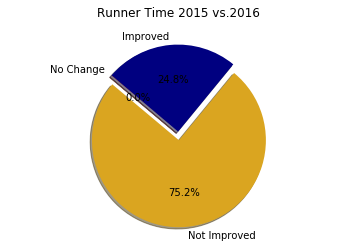

In [18]:
labels = [ "Not Improved","Improved","No Change"]
sizes = [4203, 1386, 2]
colors = ["goldenrod","navy", "orangered"]
explode = (0.1, 0, 0)
plt.axis("equal")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Runner Time 2015 vs.2016")
plt.savefig("Images/Percentage of Runners Who Improved in 2015 vs. 2016.png")

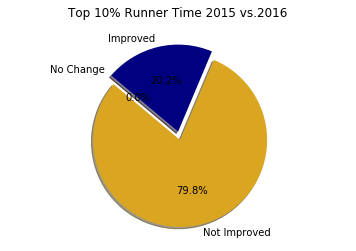

In [48]:
labels = [ "Not Improved","Improved","No Change"]
sizes = [394, 100, 0]
colors = ["goldenrod","navy", "orangered"]
explode = (0.1, 0, 0)
plt.axis("equal")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Top 10% Runner Time 2015 vs.2016")
plt.savefig("Images/Percentage of Top 10% Runners Who Improved in 2015 vs. 2016.png")

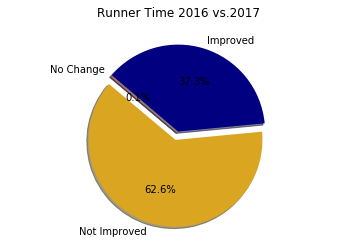

In [19]:
labels = [ "Not Improved","Improved","No Change"]
sizes = [3158, 1881, 4]
colors = ["goldenrod","navy", "orangered"]
explode = (0.1, 0, 0)
plt.axis("equal")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Runner Time 2016 vs.2017")
plt.savefig("Images/Percentage of Runners Who Improved in 2016 vs. 2017.png")

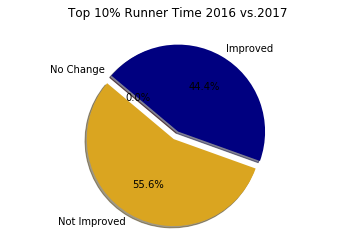

In [62]:
labels = [ "Not Improved","Improved","No Change"]
sizes = [272, 217, 0]
colors = ["goldenrod","navy", "orangered"]
explode = (0.1, 0, 0)
plt.axis("equal")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Top 10% Runner Time 2016 vs.2017")
plt.savefig("Images/Percentage of Top 10% Runners Who Improved in 2016 vs. 2017.png")

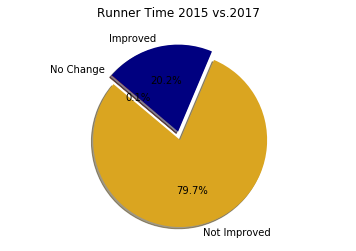

In [20]:
labels = [ "Not Improved","Improved","No Change"]
sizes = [3150, 798, 2]
colors = ["goldenrod","navy", "orangered"]
explode = (0.1, 0, 0)
plt.axis("equal")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Runner Time 2015 vs.2017")
plt.savefig("Images/Percentage of Runners Who Improved in 2 Years.png")

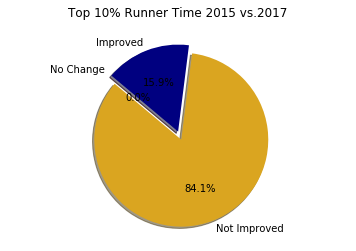

In [61]:
labels = [ "Not Improved","Improved","No Change"]
sizes = [286,54,0]
colors = ["goldenrod","navy", "orangered"]
explode = (0.1, 0, 0)
plt.axis("equal")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Top 10% Runner Time 2015 vs.2017")
plt.savefig("Images/Percentage of Top 10% Runners Who Improved in 2 Years.png")

In [52]:
runnertime_20152016_2017_df = pd.merge(runnertime_20152016_df,runnertime_20162017_df,on="Name")
runnertime_20152016_2017_df.head()

,Name,Official Time_x_x,Official Time_y_x,time_difference_20152016_x,Official Time_2015,Official Time_2016_x,time_difference_20152016_sign,Official Time_x_y,Official Time_y_y,time_difference_20152016_y,Official Time_2016_y,Official Time_2017,time_difference_20162017,time_difference_20162017_sign
0,"Korir, Wesley",7849,8045,196,7849,8045,1,8045,8294,,8045,8294,249,1
1,"Mercier, Christian",8677,9270,593,8677,9270,1,9270,9874,,9270,9874,604,1
2,"Boudalia, Said Sr.",8689,8861,172,8689,8861,1,8861,9011,,8861,9011,150,1
3,"Deba, Buzunesh",8709,9236,527,8709,9236,1,9236,9058,,9236,9058,-178,-1
4,"Ayr, Jason M.",8714,9164,450,8714,9164,1,9164,8689,,9164,8689,-475,-1


In [53]:
runnertime_201520162017_df = pd.merge(runnertime_20152016_2017_df,runnertime_20152017_df,on="Name")
runnertime_201520162017_df.head()

,Name,Official Time_x_x,Official Time_y_x,time_difference_20152016_x,Official Time_2015_x,Official Time_2016_x,time_difference_20152016_sign,Official Time_x_y,Official Time_y_y,time_difference_20152016_y,...,Official Time_2017_x,time_difference_20162017,time_difference_20162017_sign,Official Time_x,Official Time_y,time_difference_20152016,Official Time_2015_y,Official Time_2017_y,time_difference_20152017,time_difference_20152017_sign
0,"Korir, Wesley",7849,8045,196,7849,8045,1,8045,8294,,...,8294,249,1,7849,8294,,7788,8042,254,1
1,"Mercier, Christian",8677,9270,593,8677,9270,1,9270,9874,,...,9874,604,1,8677,9874,,8677,9270,593,1
2,"Boudalia, Said Sr.",8689,8861,172,8689,8861,1,8861,9011,,...,9011,150,1,8689,9011,,8689,8861,172,1
3,"Deba, Buzunesh",8709,9236,527,8709,9236,1,9236,9058,,...,9058,-178,-1,8709,9058,,8709,9236,527,1
4,"Ayr, Jason M.",8714,9164,450,8714,9164,1,9164,8689,,...,8689,-475,-1,8714,8689,,8714,9164,450,1


In [54]:
runnertime_df=runnertime_201520162017_df.loc[:,["Name","time_difference_20152016_sign","time_difference_20162017_sign"]]
runnertime_df.head(20)

,Name,time_difference_20152016_sign,time_difference_20162017_sign
0,"Korir, Wesley",1,1
1,"Mercier, Christian",1,1
2,"Boudalia, Said Sr.",1,1
3,"Deba, Buzunesh",1,-1
4,"Ayr, Jason M.",1,-1
5,"Varner, Alexander",1,-1
6,"Ornelas, Zachary",1,-1
7,"Ohara, Chip",1,1
8,"Huberty, Bryan",1,1
9,"Bond, Robert J.",-1,1


In [55]:
runnertime_df['sign_count'] = runnertime_df.apply(lambda _: '', axis=1)
runnertime_df.head()

,Name,time_difference_20152016_sign,time_difference_20162017_sign,sign_count
0,"Korir, Wesley",1,1,
1,"Mercier, Christian",1,1,
2,"Boudalia, Said Sr.",1,1,
3,"Deba, Buzunesh",1,-1,
4,"Ayr, Jason M.",1,-1,


In [56]:
runnertime_df["sign_count"] = runnertime_df["time_difference_20152016_sign"] + runnertime_df["time_difference_20162017_sign"]
runnertime_df.head()

,Name,time_difference_20152016_sign,time_difference_20162017_sign,sign_count
0,"Korir, Wesley",1,1,2
1,"Mercier, Christian",1,1,2
2,"Boudalia, Said Sr.",1,1,2
3,"Deba, Buzunesh",1,-1,0
4,"Ayr, Jason M.",1,-1,0


In [57]:
runnertime_df['sign_count'] = np.sign(runnertime_df.sign_count)
runnertime_grouped_df=pd.DataFrame(runnertime_df.groupby('Name').sign_count.value_counts())
runnertime_grouped_df.head(5)

,,sign_count
Name,sign_count,
"Aitken, Kyle",1,1
"Aitken, Miles",0,1
"Alexander, Jeff",0,1
"Alzate, Alejandro",0,1
"Anis, Michael",0,1


In [58]:
pos_neg_df = runnertime_df['sign_count'].value_counts()
pos_neg_df.head()

 0    116
 1     64
-1     23
Name: sign_count, dtype: int64

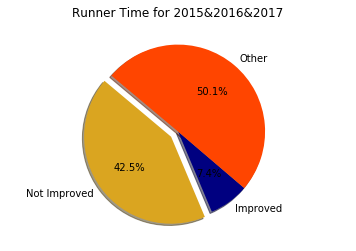

In [28]:
labels = [ "Not Improved","Improved","Other"]
sizes = [1060, 185,1252 ]
colors = ["goldenrod","navy", "orangered"]
explode = (0.1, 0, 0)
plt.axis("equal")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Runner Time for 2015&2016&2017")
plt.savefig("Images/Percentage of Runners Who Improved in Three Years.png")

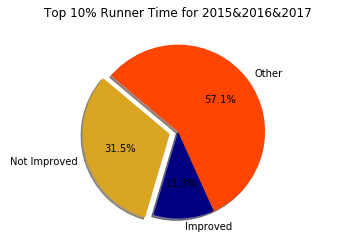

In [60]:
labels = [ "Not Improved","Improved","Other"]
sizes = [64, 23,116]
colors = ["goldenrod","navy", "orangered"]
explode = (0.1, 0, 0)
plt.axis("equal")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Top 10% Runner Time for 2015&2016&2017")
plt.savefig("Images/Percentage of Top 10% Runners Who Improved in Three Years.png")